# **PREDICTION DES PRIX DE MAISONS**

In [1]:
# Chargement des packages
import numpy as np
import pandas as pd

C:\Users\aurel\AppData\Local\Temp\ipykernel_37804\1972421760.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("C:/Users/aurel/Documents/Python Scripts/Machine learning/housing.csv")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


### Exploration des données

In [4]:
# Informations sur le dataframe
print("Dimension du df :", df.shape, "\n")
print(df.info())

Dimension du df : (5000, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
None


In [5]:
# Statistiques descriptives
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


#### Analyse de données

In [9]:
# On va se focaliser sur notre variable cible. Pour ça on importe qlq packages :
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

%matplotlib inline

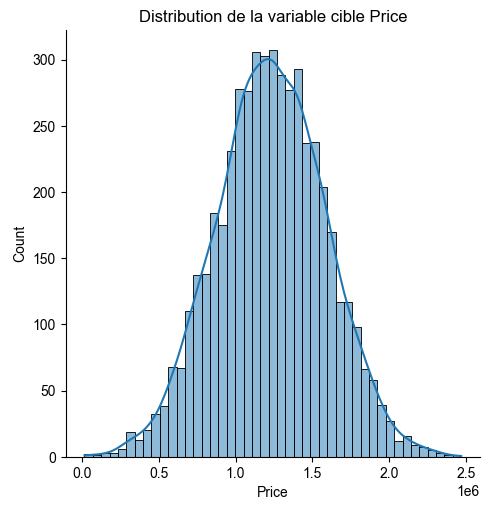

In [7]:
# Distribution des prix
sns.displot(df["Price"], kde = True)
sns.set_style("whitegrid")
plt.pyplot.title("Distribution de la variable cible Price")
plt.pyplot.show()

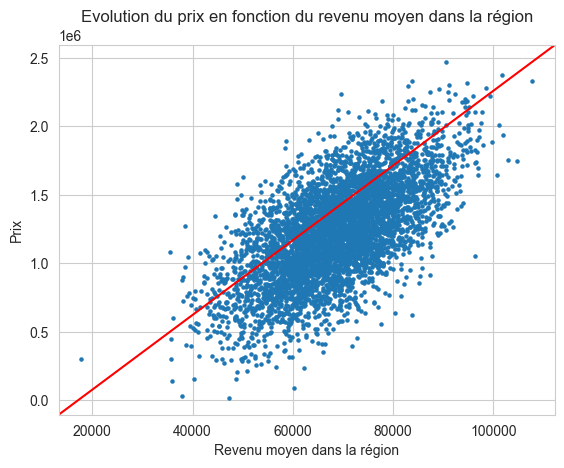

In [10]:
fig, ax = plt.subplots()
ax.scatter(df["Avg. Area Income"], df["Price"], s = 5)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform) 
ax.add_line(line)
plt.xlabel("Revenu moyen dans la région")
plt.ylabel("Prix")
plt.title("Evolution du prix en fonction du revenu moyen dans la région")
plt.show()

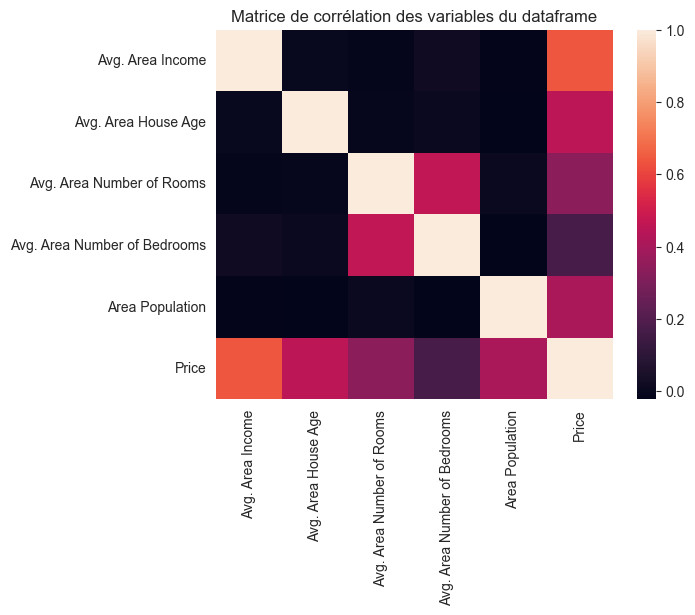

In [11]:
# On exclut la colonne "Address" du DataFrame avant de calculer la corrélation
df_corr = df.drop("Address", axis=1)
# Et on crée la matrice de corrélation avec Seaborn
sns.heatmap(df_corr.corr())
plt.title("Matrice de corrélation des variables du dataframe")
plt.show()

In [12]:
# Coeff de pearson
from scipy.stats import pearsonr

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\aurel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [13]:
# Calcul du coefficient de corrélation de Pearson et p-value
result = pd.DataFrame(pearsonr(df["Price"], df["Avg. Area Income"]), index=['pearson_coeff', 'p-value'], columns=['Test de Pearson'])
result

,Test de Pearson
pearson_coeff,0.639734
p-value,0.000000


#### Cleaning des données et preprocessing

In [14]:
# Point sur les valeurs manquantes (NA values)
print("Nombre de valeurs N/A : \n", df.isna().sum())
print("\n")
print("Nombre de doublons : \n", df.duplicated().sum())

Nombre de valeurs N/A : 
 Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


Nombre de doublons : 
 0


In [15]:
y = df["Price"]  # Variable à prédire
x = df.drop(["Price", "Address"], axis=1)  # variables explicatives
x

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947
...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103
4996,78491.27543,6.999135,6.576763,4.02,25616.11549
4997,63390.68689,7.250591,4.805081,2.13,33266.14549
4998,68001.33124,5.534388,7.130144,5.44,42625.62016


On va découper notre jeu de données en ensemble d'entrainement et en ensemble de test

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)
# 20% de nos données sont dans l'ensemble de test et 80% en entrainement (test_size = 0.2)

In [17]:
from sklearn.preprocessing import StandardScaler

# Standardisation des variables (afin de les remettre à la même échelle)
scaler = StandardScaler()
num = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']
x_train[num] = scaler.fit_transform(x_train[num])
x_test[num] = scaler.transform(x_test[num])

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

reg = LinearRegression()
# Entraînemet du modèle sur l'ensemble d'entraînement
reg.fit(x_train, y_train)
# Prédictions sur l'ensemble de test
y_pred = reg.predict(x_test)
# Performances du modèle
print(f"Score : {round(r2_score(y_test, y_pred), 2)}") # On a un score assez élevé ce qui montre qu notre modèle a une bonne capacité prédictive

Score : 0.92


Prédictions de y_test : [ 789625.3591325   697471.06143162 1413796.23095082 1196158.46208799
  780087.86352439 1185894.5677033  1248670.85635491  974456.19381429
 1910336.5724578  1696218.12704412 1224798.1546975  1158266.62216066
 1192504.29883781 1757083.19834497  759167.20079703 1440523.62891408
 1141252.21166452  960010.38840264 1172929.23965694 1651048.27387307
  936749.55028444 1226724.05273284 1609292.55908497 1323705.40433432
 1302078.28153813  790468.54619289 1555030.06630481 1448934.04468773
 1415600.16265704  920016.49681583  805943.33200239  863961.34920625
 1443097.21934682 1092153.34785114 1734060.16648054 1223937.56456485
  989577.37647173 1543646.01602411  700338.38502443 1094326.50503141
 1397031.55482357 2230615.45328129  904495.51572361  880662.96846895
 1099338.10061502 1729770.66514098 1762781.46940118 1597651.38302853
 1139294.54246048 1445869.70550478 1375352.86513549  901976.39326823
 1381541.56304166  653088.67716408  872398.49942188 1349195.4465

In [ ]:
# Les prix prédits
print("Prédictions de y_test :", y_pred)

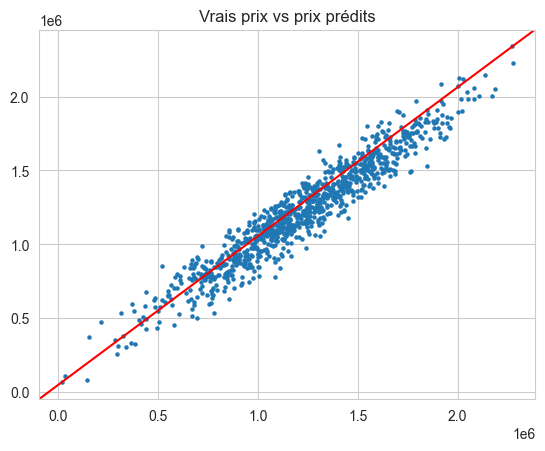

In [19]:
#Prix prédits par rapports aux prix réels
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, s = 5)
line = mlines.Line2D([0, 1], [0, 1], color = 'red')
transform = ax.transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.title("Vrais prix vs prix prédits")
plt.show()